In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from tqdm import tqdm
import matplotlib.pyplot as plt

users = pd.read_csv('../../../dataset/userid-profile.tsv', sep='\t', header=0, index_col='#id')
listening_history = pd.read_csv('../../../dataset/userid-timestamp-artid-artname-traid-traname.tsv', sep='\t', encoding='utf-8', header=None, error_bad_lines=False)
listening_history.columns = ["#id", "timestamp ", "artist-id", "artist-name", "track-id","track-name"]

b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 8709941: expected 6 fields, saw 11\nSkipping line 8709958: expected 6 fields, saw 11\nSkipping line 8710163: expected 6 fields, saw 11\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [2]:
#calculate  the distirbution of the users
unique_users = listening_history['#id'].unique()
unique_tracks = listening_history['track-name'].unique()
print ('Number of unique users : ' + str(len(unique_users)))
print ('Number of unique tracks : ' + str(len(unique_tracks)))
print ('Times of tracks being listened: ' + str(len(listening_history)))

Number of unique users : 1017
Number of unique tracks : 1083488
Times of tracks being listened: 19098850


In [3]:
# remap the users
track_keys = {}

for track in unique_tracks:
    track_keys[track] = len(track_keys)
    
user_keys = {}

for user in unique_users:
    user_keys[user] = len(user_keys)
    
unique_user = len(unique_users)
unique_track = len(unique_tracks)
    

In [4]:
listening_history

,#id,timestamp,artist-id,artist-name,track-id,track-name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,åæ¬é¾ä¸,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,åæ¬é¾ä¸,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,åæ¬é¾ä¸,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,åæ¬é¾ä¸,NaN,Mc1 (Live_2009_4_15)
...,...,...,...,...,...,...
19098845,user_001000,2008-01-27T22:02:35Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me
19098846,user_001000,2008-01-27T21:56:52Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off
19098847,user_001000,2008-01-27T21:52:36Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds
19098848,user_001000,2008-01-27T21:49:12Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky


In [4]:
listening_history['tid']= listening_history['track-name'].map(track_keys)
listening_history['uid']= listening_history['#id'].map(user_keys)

In [5]:
lh = listening_history[['uid','tid']]

In [6]:
lh['count'] = 1

/home/han/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
lh = lh.groupby(["uid", "tid"]).sum().reset_index()
lh[:10]

,uid,tid,count
0,0,0,1
1,0,1,16
2,0,2,12
3,0,3,13
4,0,4,15
5,0,5,15
6,0,6,15
7,0,7,16
8,0,8,17
9,0,9,20


In [8]:
lh.to_pickle('../data/counting.pkl')

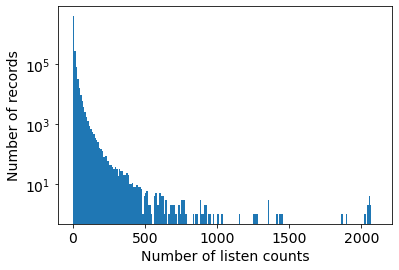

In [11]:
lh_list = lh['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh['count'].max()+1,10)]
plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./data_vasualization.png', dpi=600)
plt.show()

In [12]:
lh_u_max = lh[lh['uid']==7]
lh_u_max = lh_u_max.sort_values(by='count', ascending='True')
lh_u_max[-5:]

,uid,tid,count
32932,7,29456,2059
32929,7,29453,2059
32933,7,29457,2065
32761,7,29285,2069
32931,7,29455,2119


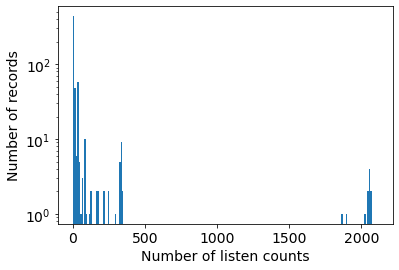

In [13]:
lh_list = lh_u_max['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh_u_max['count'].max()+1,10)]
n, bins, patches = plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./data_vasualization.png', dpi=600)
plt.show()

In [ ]:
max_list = []
for i in lh['uid'].unique():
    user = lh[lh['uid'] == i]
    max_value = max(user['count'])
    max_list.append(max_value)

In [ ]:
counting_list = []
for i in range(0, unique_user):
    counting_list.append(np.zeros(unique_track, dtype=np.int))

In [ ]:
for i in tqdm(range(unique_track)):
    temp = lh[lh['tid'] == i]
    for index, row in temp.iterrows():
        uindex = int(row['uid'])
        counting_list[uindex][i] = row['count']

In [ ]:
np.savetxt("../data/counting_list.csv", counting_list, delimiter=",", fmt='%d')

In [ ]:
#minmax

In [ ]:
normalized_list = []
for i in range(0, unique_user):
    normalized_list.append(np.zeros(unique_track, dtype=np.int))

In [ ]:
for i in tqdm(lh['uid'].unique()):
    user = lh[lh['uid'] == i]
    max_value = max(user['count'])
    normalized_list[i] = [j *5 / max_value for j in counting_list[i]]

In [ ]:
np.savetxt("../data/normalized_list.csv", normalized_list, delimiter=",")

In [ ]:
counting_list

In [ ]:
normalized_list

In [ ]:
normalized_pd = lh.copy()
normalized_pd.rename(columns={'count':'rating'}, inplace=True)
normalized_pd = normalized_pd.astype({'rating': 'float64'})

In [ ]:
for i in tqdm(range(unique_user)):
    temp = lh[lh['uid'] == i]
    for index, row in temp.iterrows():
        normalized_pd['rating'][index] /= max_list[i]
        normalized_pd['rating'][index] *= 5

In [ ]:
normalized_pd.to_pickle('../data/normalized_pd.pkl')